# Import Library

In [1]:
#install Library yang diperlukan
!pip install tpot
!pip install sklearn
!pip install seaborn

     |████████████████████████████████| 92kB 5.0MB/s 
     |████████████████████████████████| 163kB 27.0MB/s 
     |████████████████████████████████| 166.7MB 77kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=aa87dad8e88197eacafb1c7d672450f6564ed996ead57ea515534cbbe68d74fa
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
#melakukan import library yang diperlukan
import pandas as pd
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#pemberian akses ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [4]:
#melakukan import dataset weatherAUS.csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')

# Eksplorasi Data

In [5]:
# menghitung banyak data dan jumlah fitur
print('Banyak Data: ', data.shape[0])
print('Banyak Fitur: ', data.shape[1]-3)

Banyak Data:  145460
Banyak Fitur:  20


# Persiapan Data

In [6]:
#menghitung jumlah fitur yang memiliki nilai null
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Data Cleaning

In [7]:
#menghapus data yang tidak memiliki label
data = data[~data['RainTomorrow'].isnull()]

## Missing Value Handling

In [8]:
#penanganan missing value untuk fitur kategorikal
catFeature = ['Location',
              'WindGustDir',
              'WindDir9am',
              'WindDir3pm',
              'RainToday']
for i in catFeature:
  mode = data[i].mode()
  data[i].fillna(mode[0], inplace = True)

In [9]:
#penanganan missing value untuk fitur kontinu
numFeature = ['MinTemp',
              'MaxTemp',
              'Rainfall',
              'Evaporation',
              'Sunshine',
              'WindGustSpeed',
              'WindSpeed9am',
              'WindSpeed3pm',
              'Humidity9am',
              'Humidity3pm',
              'Pressure9am',
              'Pressure3pm',
              'Cloud9am',
              'Cloud3pm',
              'Temp9am',
              'Temp3pm']
for i in numFeature:
  mean = data[i].mean()
  data[i].fillna(mean, inplace = True)

## Transformasi Fitur Kategorikal

In [10]:
#merubah fitur kategorikal menjadi numerik
for i in catFeature:
  data[i] = LabelEncoder().fit_transform(data[i])
data['RainTomorrow'] = LabelEncoder().fit_transform(data['RainTomorrow'])

## Feature Selection

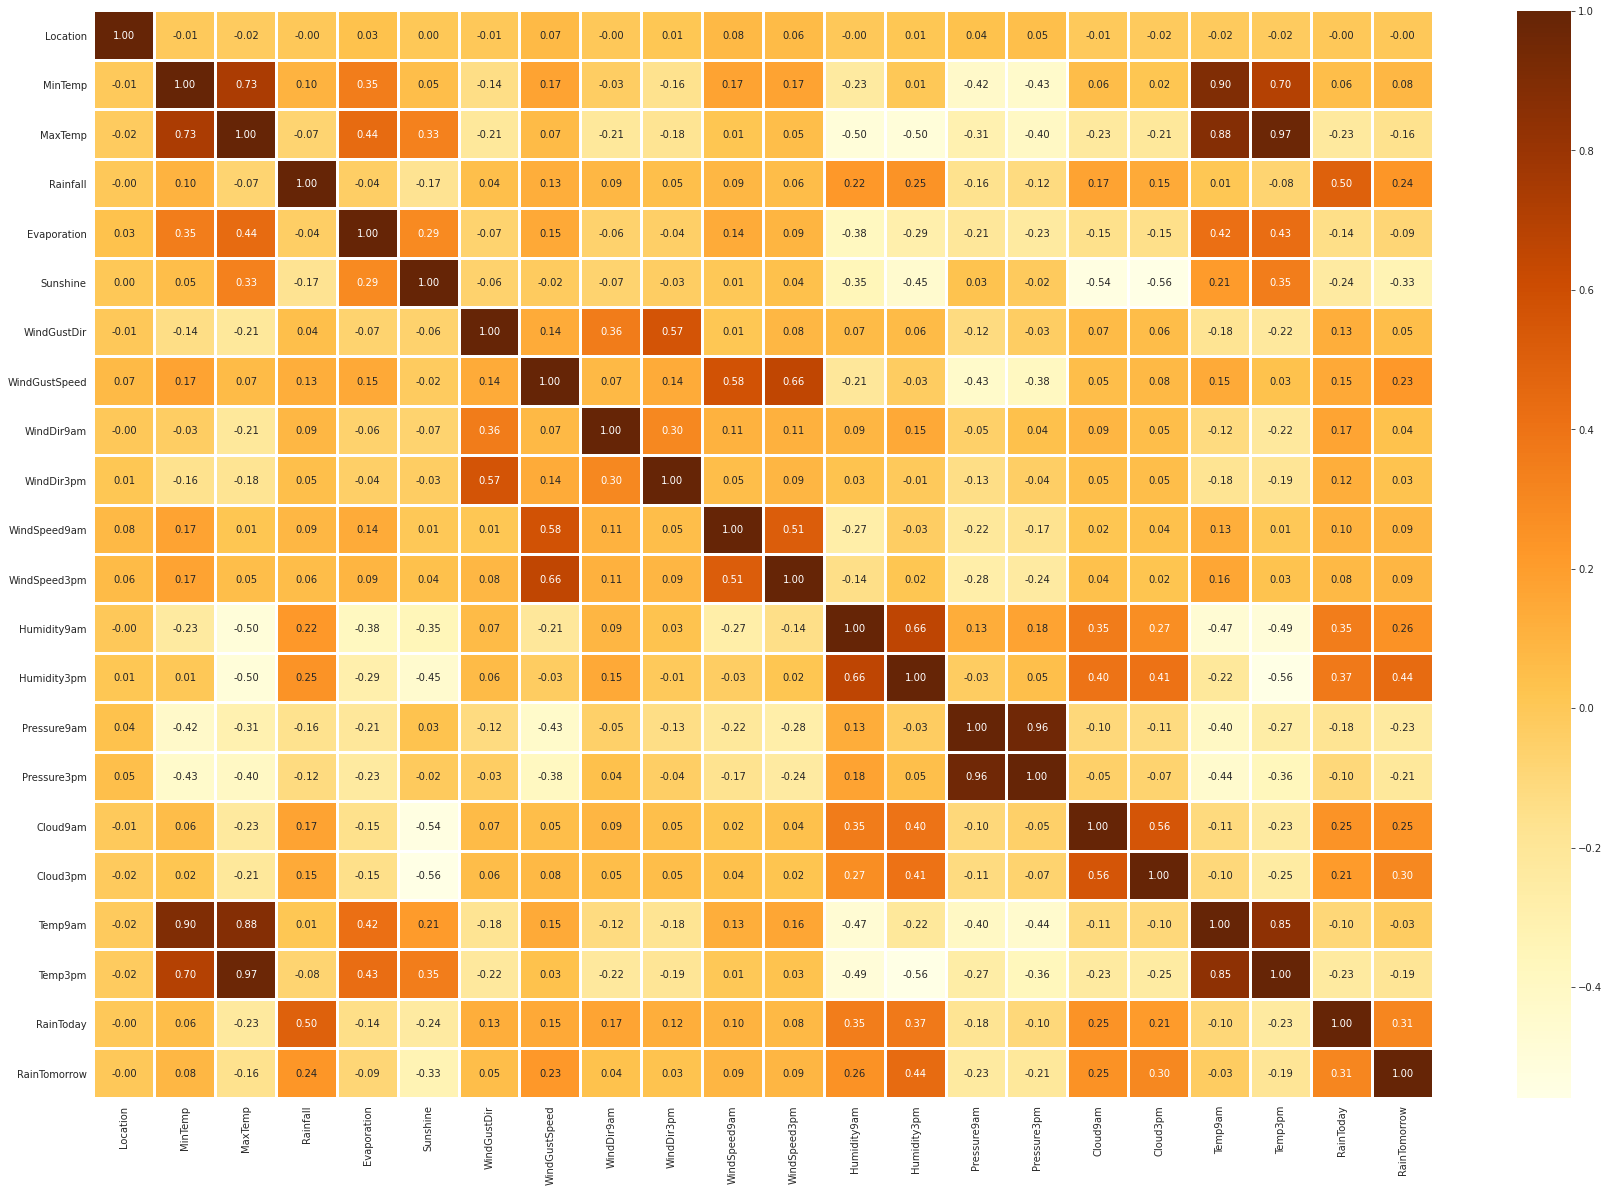

In [11]:
#menggambarkan correlation matrix
sns.set({'figure.figsize':(30,20)})
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths= 2, cmap="YlOrBr")

In [12]:
#menghapus fitur yang korelasinya dibawah 10%
data.drop(['Location', 'MinTemp','Evaporation','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am',
           'WindSpeed3pm','Temp9am'], axis='columns', inplace=True)
#menghapus fitur yang korelasinya dibawah 5%
#data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Temp9am'], axis='columns', inplace=True)

## Ekspor Dataset Hasil Eksplorasi

In [13]:
#ekspor dataset hasil eksplorasi menjadi file csv
data.to_csv('HasilEksplorasi.csv')

## Data Split

In [14]:
#melakukan split data menjadi data test dan train (beserta tabel fitur dan tabel label)
label = data['RainTomorrow']
feature = data.drop('RainTomorrow', axis=1)
featureTrain, featureTest,labelTrain,labelTest = train_test_split(feature,label, 
                                                                  test_size = 0.15,random_state = 12)

## Scaling

In [15]:
#melakukan scaling sehingga fitur berada pada rentang yang sama
featureTrain = featureTrain.drop('Date',axis=1)
featureTest = featureTest.drop('Date',axis=1)
#featureTrain = MinMaxScaler().fit_transform(featureTrain)
#featureTest = MinMaxScaler().fit_transform(featureTest)
featureTrain = StandardScaler().fit_transform(featureTrain)
featureTest = StandardScaler().fit_transform(featureTest)

## Dimensionality Reduction

In [16]:
#memperkecil ukuran fitur menggunakan metode PCA
pca = PCA(n_components=6)
components = pca.fit_transform(featureTrain)
featureTrain = pd.DataFrame(data=components)
pca = PCA(n_components=6)
components = pca.fit_transform(featureTest)
featureTest = pd.DataFrame(data=components)

# Pemodelan Data

In [17]:
THIS MEANT TO BE ERROR CUZ U KNOW IT WILL TAKE A LONG TIME TO RUN
#melakukan pemodelan menggunakan TPOT
tpot = TPOTClassifier(verbosity=2, generations=3)
tpot.fit(featureTrain, labelTrain)

SyntaxError: ignored

In [ ]:
#menunjukkan pipeline terbaik yang telah dihasilkan TPOT
tpot.fitted_pipeline_

In [ ]:
#menghitung nilai akurasi terbaik yang dihasilkan TPOT
tpot.score(featureTest, labelTest)

In [ ]:
#Menuliskan report dari model yang dihasilkan TPOT
labelPredTpot = tpot.predict(featureTest)
print(classification_report(labelTest, labelPredTpot))